

# Лабораторная работа No1. Сигналы телекоммуникационных систем


## Цели
Познакомиться со средствами генерации и визуализации простых сигналов,
c различными программными средствами цифоровой обработки сигнала, научиться ими пользоваться 
вследствие выполнения поставленных задач.


## Постановка задачи
В командном окне MATLAB и в среде Simulink
промоделировать сигналы из Главы 3, сс. 150–170 (см. Справочные
материалы). В качестве альтернативного программного средства можно использовать 
язык python и различные сопутствующие инструменты(Jupyter Notebook).
После выполнения моделирования так же требуется оформить отчет с помощью LaTeX.  


## Основная часть 

В качестве языка выбираем python 3. Основные библиотеки, которые нам потребуются:
- scipy.signal - для обработки сигналов
- mathplotlib - для построения графиков
- numpy  - для удобной работы с матрицами и векторами 


Для моделирования и выполнения кода будем использовать
Jupyter Notebook.


### 1 Введение 
В качестве ознакомления со средствами моделирования с помощью python
реализуем гармонический сигнал, задаваемый формулой:
\begin{align}
    s_1(t) = \cos(2\pi f_0t +\phi)
\end{align}

Для этого сначала реализуем функцию поэлементного умножения по аналогии с MATLAB:


In [1]:
% autocall 1

def elem_multiple(a, b):
	if a.shape != b.shape:
		raise IOError("Shapes of matrices are not the same")
		return
	else:
		res = np.zeros(a.shape)
		for i in range(a.shape[0]):
			for j in range(a.shape[1]):
				res[(i,j)] = a[(i,j)] * b[(i,j)]
		# print(res.shape)
		return res

Automatic calling is: Smart


Иницилизируем все необходимые параметры для моделирования сигнала и с помощью matplotlib выводим зависимость график
$s_1(t)$

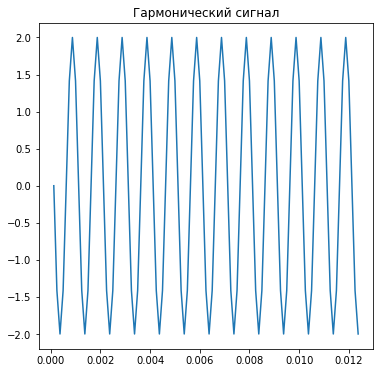

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

Fs = 8000 # discrete frequency 
t = np.matrix(np.arange(0.0, 1.0, (1 / Fs))).transpose()
A = 2 # amplitude
f0 = 1000
phi =  np.pi /4 
s1 = A * np.cos(2 * np.pi *  f0 * t + phi) # harmonic signal
fig = plt.figure(figsize=(6,6))
plt.title('Гармонический сигнал')
plt.plot(t[1:100],s1[1:100])
fig.savefig('source/picturesNote/001harmonic.png', dpi=200)
plt.show()

Получаем искомый гармонический сигнал. Далее моделируем гармонический сигнал, но уже затухающий:
\begin{align}
    s_2(t) = \cos(2\pi f_0t+\phi)e^{-\alpha t}
\end{align}

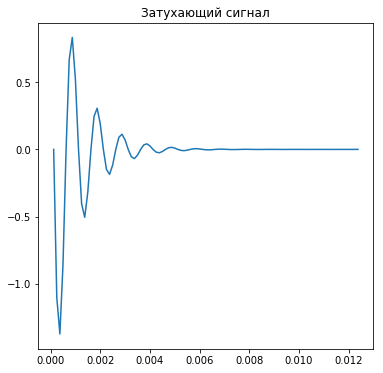

In [3]:
import numpy as np
import matplotlib.pyplot as plt

     
Fs = 8000 # discrete frequency 
t = np.matrix(np.arange(0.0, 1.0, (1 / Fs))).transpose()
f0 = 1000

phi =  np.pi /4 
alpha = 1000

s2 = elem_multiple(s1, np.exp(-alpha * t))

fig = plt.figure(figsize=(6,6))
plt.title('Затухающий сигнал')
plt.plot(t[1:100],s2[1:100])
fig.savefig('source/picturesNote/002harmonic.png', dpi=100)
plt.show()

Далее промоделируем многоканальный сигнал (у каждого канала будет просто своя частота), взяв число канальности равное 5. Сигнал будет так же гармоническим: $s_3(t) = \cos(2\pi f_0t)$, 
где $f_0= (600, 800, 1000, 1200, 1400)$ 



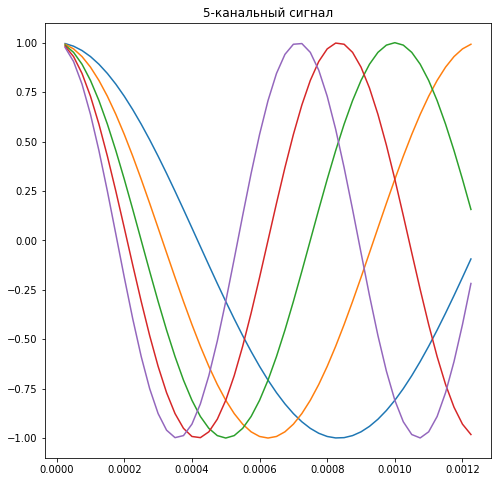

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Fs = 40000 # discrete frequency 
t = np.matrix(np.arange(0.0, 1.0, (1 / Fs))).transpose()
f = np.matrix([600, 800, 1000, 1200, 1400])

s3 = np.matrix(np.cos(2*np.pi * t * f)) # 5 channels signal

fig = plt.figure(figsize=(8, 8))
plt.title('5-канальный сигнал')
plt.plot(t[1:50], s3[1:50])
fig.savefig('source/picturesNote/003_5chnls.png', dpi=200)
plt.show()

В соотвествии с теорией получаем семейство косинусов с различными фазами - искомый многоканальный сигнал.


### 2 Одиночные импульсы
В библиотеке python scipy.signal в отличие от MATLAB нет функций генерации одиночных имплусов, поэтому для примера реализуем прямоуголный импульс самостоятельно.  



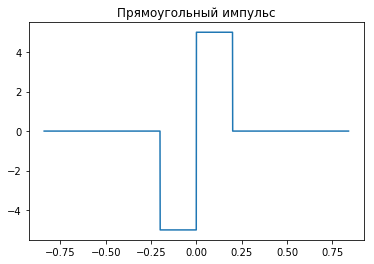

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# rectangular impulse
def rect_impls_1(t, width): 
	sig = np.zeros(len(t))
	for i in sig:
		if -width/2 <= i < width / 2:
			i = 1
	for i in range(len(sig)):
		if -width/2 <= t[i] < width / 2:
			sig[i] = 1
	return sig

Fs = 1000
t = np.matrix(np.arange(-0.84, 0.84, (1 / Fs))).transpose()
width = 0.2
A = 5
s = -A *rect_impls_1(t + width / 2, width) + A * rect_impls_1(t - width / 2 ,width)
plt.title('Прямоугольный импульс')
plt.plot(t,s)
plt.gcf().savefig('source/picturesNote/004rectImp.png', dpi=100)
plt.show()

Полученный график очевидно является прямоугольным импульсом. 

Также построим импульс Гаусса, реализация которого представлена в scipy.signal. По определению Гауссов импульс представляет собой такую функцию:
\begin{align}
    y(t) = \cos(2\pi f_ct)e^{-\alpha t^2}
\end{align}

Кроме сигнала, для примера найдем и спектр Гауссова импульса.

/usr/local/lib/python3.5/dist-packages/scipy/signal/waveforms.py:236: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t == 'cutoff':  # compute cut_off point


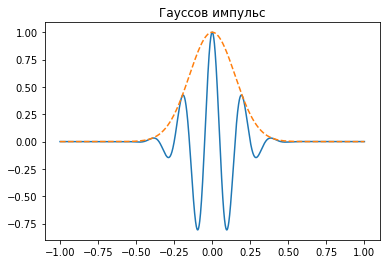

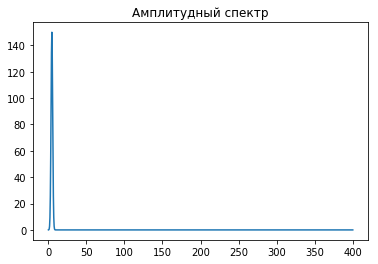

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftfreq

Fs = 800 
t = np.linspace(-1, 1, 2 * Fs)
i, e = signal.gausspulse(t, fc=5, retenv=True)
fig = plt.figure()
plt.plot(t, i, t, e, '--')
plt.title('Гауссов импульс')
fig.savefig('picturesNote/005_gaus.png', dpi=70)
plt.show()
N = len(t)
Fs = 800
T = 1.0 / Fs 
y = i 
yf = fft(y)
xf = fftfreq(N, 1.0 / Fs)
fig = plt.figure()
plt.title('Амплитудный спектр')
plt.plot(xf[1:800], np.abs(yf[1:800])) 
fig.savefig('source/picturesNote/006_spctrgaus.png', dpi=70)
plt.show()

### 3 Генерация периодических сигналов
Периодические сигналы - это функции, которые позволяют формировать отсчеты периодических сигналов различной формы.
Рассмотрим последовательность уже знакомых прямоугольных импульсов.

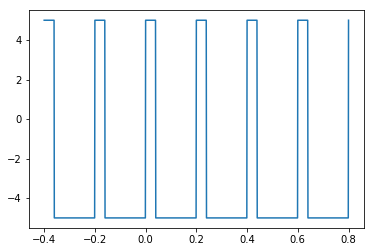

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
Fs = 1000 # discrete frequency
t = np.matrix(np.arange(-0.4, 0.8, (1 / Fs))).transpose()
A = 5         
fig = plt.figure()
plt.plot(t, A *signal.square( 2 * np.pi * 5 * t, 0.2))
fig.savefig('source/picturesNote/007rectImplses.png', dpi=100)
plt.show()

C помощью функции sawtooth из scipy.signal реализуем последовательность треугольных импульсов.

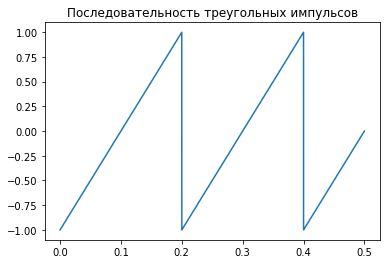

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Fs = 8000 # discrete frequency 
t = np.linspace(0, 0.5, Fs)
fig = plt.figure()
plt.title('Последовательность треугольных импульсов')
plt.plot(t, signal.sawtooth(2 * np.pi * 5  * t))
fig.savefig('source/picturesNote/008_sawtooth.png', dpi=100)
plt.show()

Реализуем также функцию Дирихле, которая описывается формулой:
\begin{align}
    diric_n(t) = \dfrac{\sin(nx/2)}{nsin(nx/2)}, n \in \mathbb Z
\end{align}

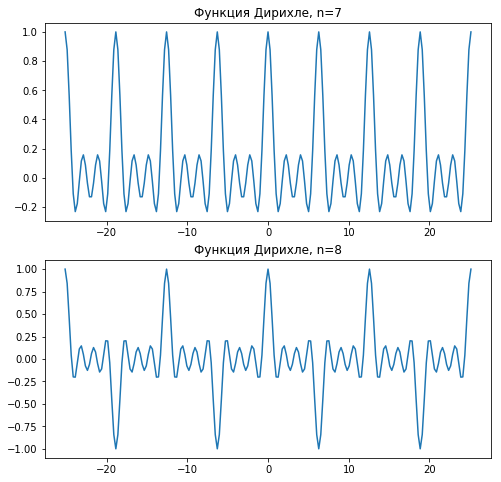

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import special


x = np.linspace(-8*np.pi, 8*np.pi, num=201)
fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(x, special.diric(x, 7))
plt.title('Функция Дирихле, n={}'.format(7))
plt.subplot(2, 1, 2)
plt.plot(x, special.diric(x, 8))
plt.title('Функция Дирихле, n={}'.format(8))
fig.savefig('source/picturesNote/009_dirichle.png', dpi = 200)
plt.show()


## Вывод 
В результате выполнению данной работы нам удалось получить элементарные навыки использования
python и JupyterNotebook для анализа и моделирования сигналов.
Также мы узнали о различных видах сигналов:
- гармонические сигналы 
- одиночные импульсы
- периодические сигналы
- сигналы с меняющейся частотой